In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='score', ylabel='iterations'>

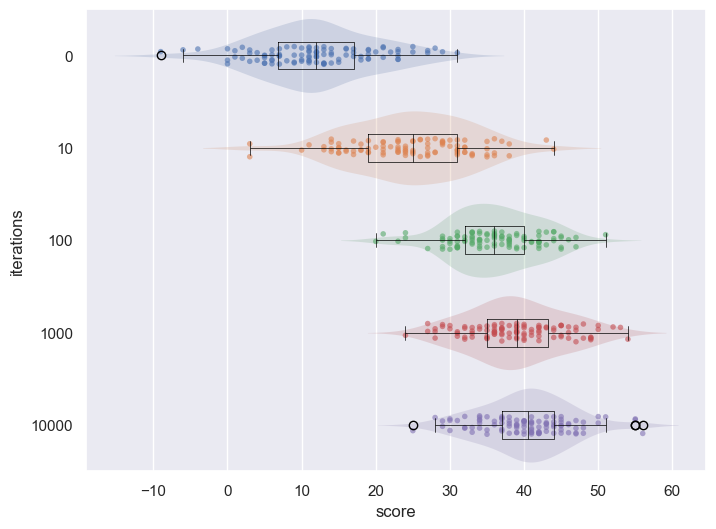

In [67]:
name = '2025-01-27'
data = pd.read_csv(f'../data/{name}.csv', names=['iterations', 'score'])
data = data[~data.iterations.str.startswith('Played ')]
data.iterations = data.iterations.str.replace('iterations: ', '').astype(str)
data.score = data.score.str.replace('score: ', '').astype(int)

sns.set_theme(rc={'figure.figsize':( 8, 6 )})
sns.boxplot(   data=data, x="score", y="iterations", fill=False, linewidth=0.5, color="black", width=0.3, zorder=100)
sns.stripplot( data=data, x="score", y="iterations", hue="iterations", palette="deep", size=4, alpha=0.6)
sns.violinplot(data=data, x="score", y="iterations", hue="iterations", palette="deep",linewidth=0, alpha=0.2)

In [2]:
def plot(name, ax=None, **kwargs):
    data = pd.read_csv(f'../data/{name}.csv', names=['duration', 'score'])

    if ax is None:
        fig, ax = plt.subplots() 
        data.plot.scatter('duration', 'score', ax=ax, alpha=0.25, c='gray')
    data.duration = pd.to_timedelta(data.duration, 'ms')
    rolling_scores = data.set_index('duration').sort_index().score.rolling('750ms', center=True).mean()
    
    rolling_scores = rolling_scores.to_frame().reset_index()
    rolling_scores.duration = rolling_scores.duration.dt.total_seconds() * 1000
    
    
    ax.plot(rolling_scores.duration, rolling_scores.score, **kwargs)
    #plt.figtext(0.5, 0.25, 'The model improves with\nmore search time, but\nquickly plateaus at\naround 2000 ms.', fontsize=10)
    
    plt.title('Model score given duration in ms')
    plt.ylim((0, 60))
    plt.xlim((0, 4000))
    
    ax

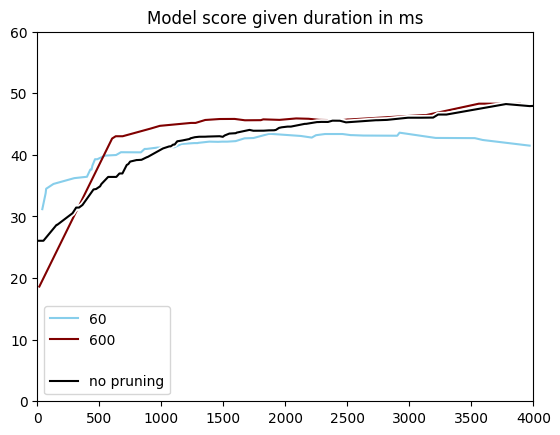

In [25]:
fig, ax = plt.subplots() 

plot('test', ax=ax, c='skyblue')
plot('prune-600-', ax=ax, c='maroon')
plot('no-prune', ax=ax, c='white', lw=4)
plot('no-prune', ax=ax, c='black')

plt.legend(['60', '600', '', 'no pruning'])